# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
#-- 載入 資料集
from sklearn import datasets
import numpy as np

#digits_n_class = 3
#digits_n_class = 4
digits_n_class = 10

digits = datasets.load_digits(n_class=digits_n_class)
X = digits.data
y = digits.target

#n_records = 500
n_records = len(X)

X = X[:n_records, :]
y = y[:n_records]

print(X.shape)
print(y.shape)
print(digits.keys())
print(digits.target_names)
print(np.unique(digits.target))
#print(digits.DESCR)
#print(digits.images)


(1797, 64)
(1797,)
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


載入 相關套件 並 執行 PCA 實驗 ...

In [2]:
#-- 載入套件
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [3]:
#-- 設定 模型 估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

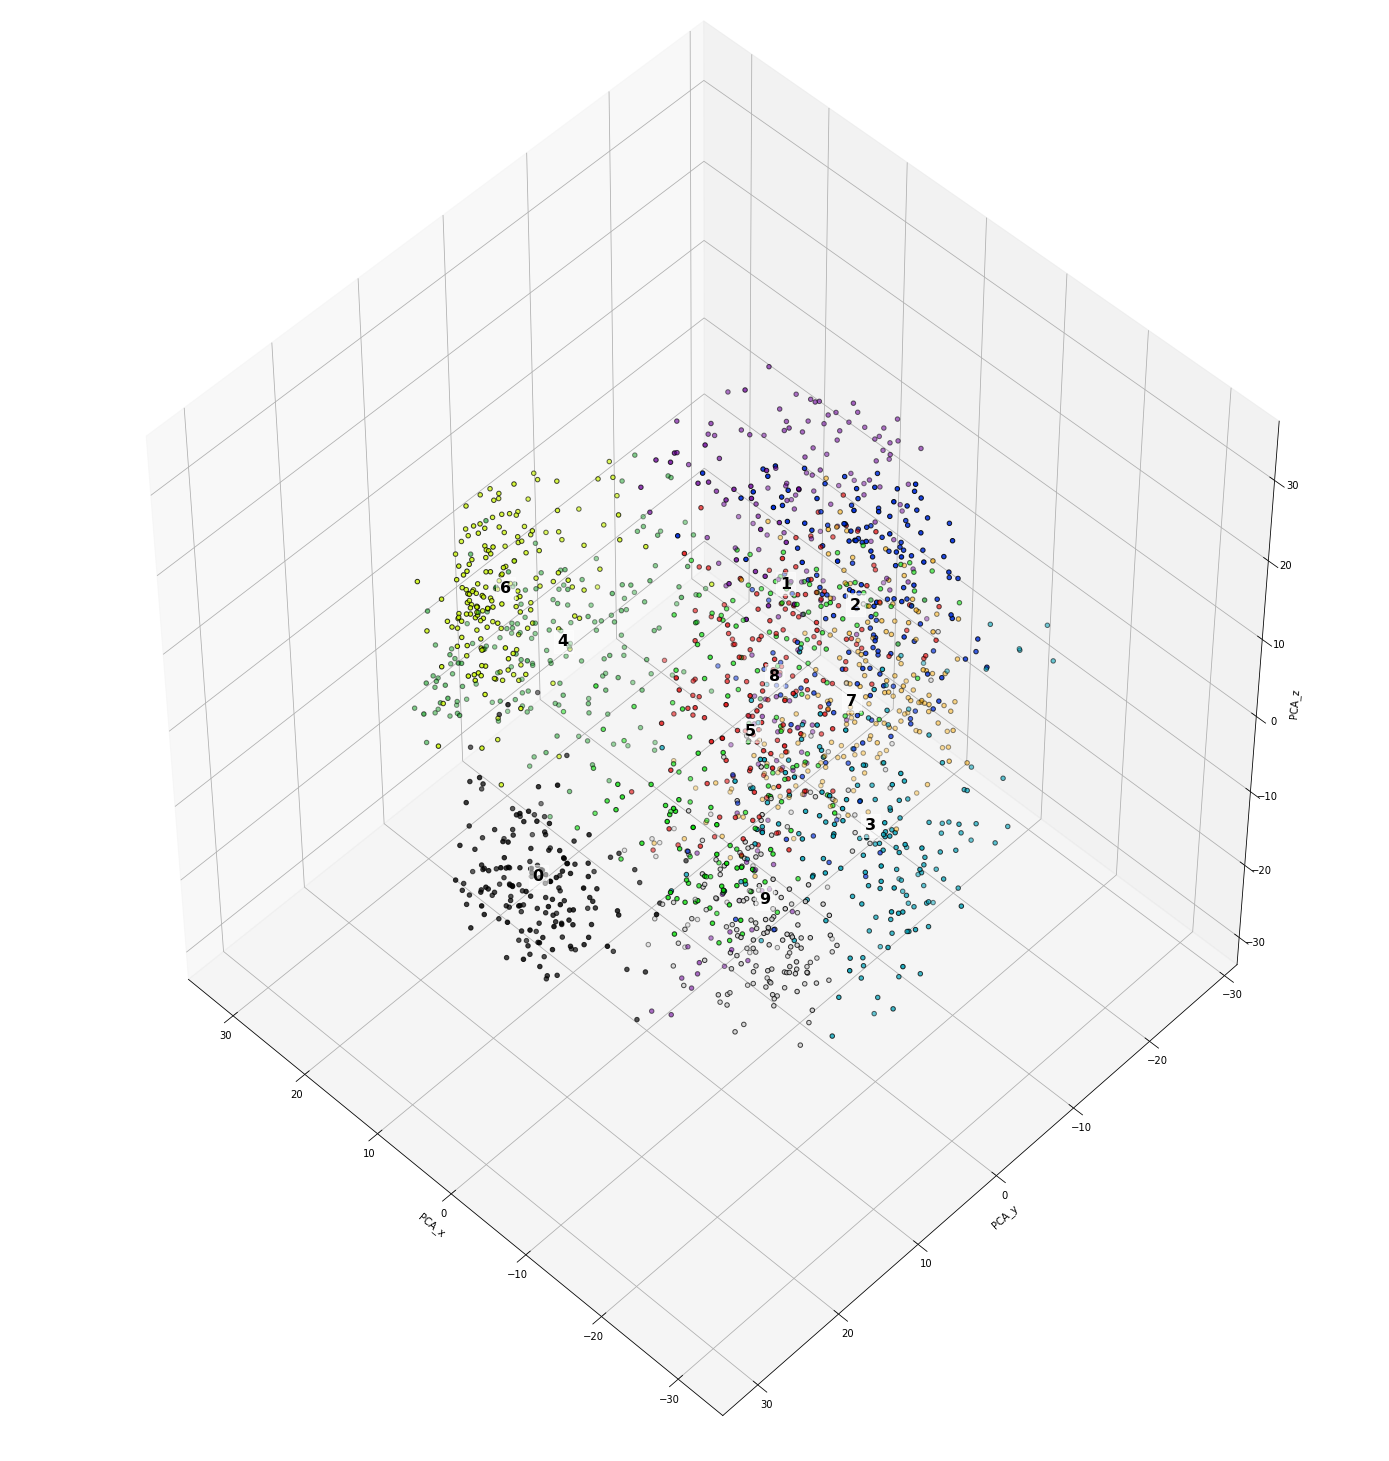

In [4]:
from matplotlib import rcParams, cycler

#-- 資料建模 並 視覺化 結果
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(20, 20))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


#for name, label in [('0', 0), ('1', 1), ('2', 2), ...]:
for name, label in [(f'{x}', x) for x in range(digits_n_class)]:
    ax.text3D(X[y == label, 0].mean(),
              #X[y == label, 1].mean() + 1.5,
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
              fontsize=16, fontweight='bold'
             )
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
#           label=cm,
           edgecolor='k'
          )

ax.set_xlabel('PCA_x')
ax.set_ylabel('PCA_y')
ax.set_zlabel('PCA_z')

#plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.)

plt.show()